# Craigslist Time Series Analysis

![](http://https://www.google.com/url?sa=i&url=https%3A%2F%2Ffreebiesupply.com%2Flogos%2Fcraigslist-logo%2F&psig=AOvVaw0ZDLk4zHVcTzJH80OexA8b&ust=1698342835995000&source=images&cd=vfe&ved=0CBIQjRxqFwoTCLj2uaDikYIDFQAAAAAdAAAAABAK)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv


In [2]:
df = pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


# Understanding the Data

In [3]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

dropping the county column and unnamed column

In [4]:
df = df.drop('county', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [5]:
#converting posting_date andremoval_date into datetime
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['removal_date'] = pd.to_datetime(df['removal_date'])

In [6]:
#getting summary statistics for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


In [7]:
df.shape

(426880, 26)

In [8]:
df['price'].max()

3736928711

In [9]:
df['price'].min()

0

In [10]:
#checking for missing values
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

In [11]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'removal_date'],
      dtype='object')

In [12]:
#displaying the value counts for columns
for column in df.columns:
    value_counts = df[column].value_counts()
    unique = len(value_counts)
    
    if unique <= 10:
        print(f"Column: {column}")
        print(value_counts)
    else:
        print(f"Column: {column}")
        print(f"Number of unique values: {unique}")

Column: id
Number of unique values: 426880
Column: url
Number of unique values: 426880
Column: region
Number of unique values: 404
Column: region_url
Number of unique values: 413
Column: price
Number of unique values: 15655
Column: year
Number of unique values: 114
Column: manufacturer
Number of unique values: 42
Column: model
Number of unique values: 29667
Column: condition
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64
Column: cylinders
cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64
Column: fuel
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
Column: odometer
Number of unique values: 104870
Column: title_status
title_status
clean         

In [13]:
#dropping image_url and description
df = df.drop('image_url', axis=1)
df = df.drop('description', axis=1)

filling the missing values in categorical columns with the mode

In [14]:
#grouping all the categorical columns
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['url', 'region', 'region_url', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive',
       'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [15]:
#filling missing values with the mode
for column in categorical_columns:
    #calculating the mode
    mode = df[column].mode()[0]
    #filling missing values with mode
    df[column].fillna(mode, inplace=True)
    

In [16]:
#grouping all the numerical columns
numerical_column = df.select_dtypes(include=['int', 'float']).columns
print(numerical_column)

Index(['id', 'price', 'year', 'odometer', 'lat', 'long'], dtype='object')


since the rows in posting_date and removal_date that have missing values are only 68 from a total of 472k rows, i am dropping the rows with missing values in both columns

In [17]:
#dropping the rows with missing values in posting_date and removal_date columns
df.dropna(subset=['posting_date', 'removal_date'], inplace=True)

In [18]:
#analyzing the year column
df['year'].nunique()


114

Dropping the year column as there are too many unique values and assuming the year of make would be bad data practices

In [19]:
df = df.drop('year', axis=1)

In [20]:
#analyzing the odometer column
df['odometer'].nunique()

104870

In [21]:
#filling the missing values in the odometer column
#calculating the median
median = df['odometer'].median()
#filling the missing values
df['odometer'].fillna(median, inplace=True)

dropping the lat and long columns to replace them with latitude and longitude using values from the python library geopy. This is to help with filling the missing values in both columns accurately

In [22]:
df =df.drop('lat', axis=1)
df = df.drop('long', axis=1)

In [23]:
#from geopy.geocoders import Nominatim
#creating new columns for latitude and longitude
#df['latitude'] = None
#df['longitude'] = None

#creating a geolocator using Nominatim
#geolocator = Nominatim(user_agent="craigslist_time_series")

#geocoding the state values
#for index, row in df.iterrows():
#    location = geolocator.geocode(row['state'])
#    if location is not None:
#        df.at[index, 'latitude'] = location.latitude
#        df.at[index, 'longitude'] = location.longitude
        
#df.head()

In [24]:
df.isna().sum()

id              0
url             0
region          0
region_url      0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
posting_date    0
removal_date    0
dtype: int64

In [25]:
#creating a column 'days_on_site' to show the number number of days between the posting_date and removal_date
df['days_on_site'] = (df['removal_date'] - df['posting_date']).dt.days

In [26]:
df['days_on_site'].describe()

count    426812.000000
mean         15.584520
std           9.060175
min           0.000000
25%           9.000000
50%          15.000000
75%          22.000000
max          63.000000
Name: days_on_site, dtype: float64

In [27]:
df.head()

,id,url,region,region_url,price,manufacturer,model,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,state,posting_date,removal_date,days_on_site
0,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,bmw,x5,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00,16
1,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,bmw,x5,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00,4
2,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,toyota,camry,excellent,4 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,fwd,full-size,sedan,silver,tx,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00,32
3,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,ford,expedition,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00,10
4,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,ford,expedition,good,6 cylinders,gas,...,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00,18


## Exploratory Data Analysis

In [28]:
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

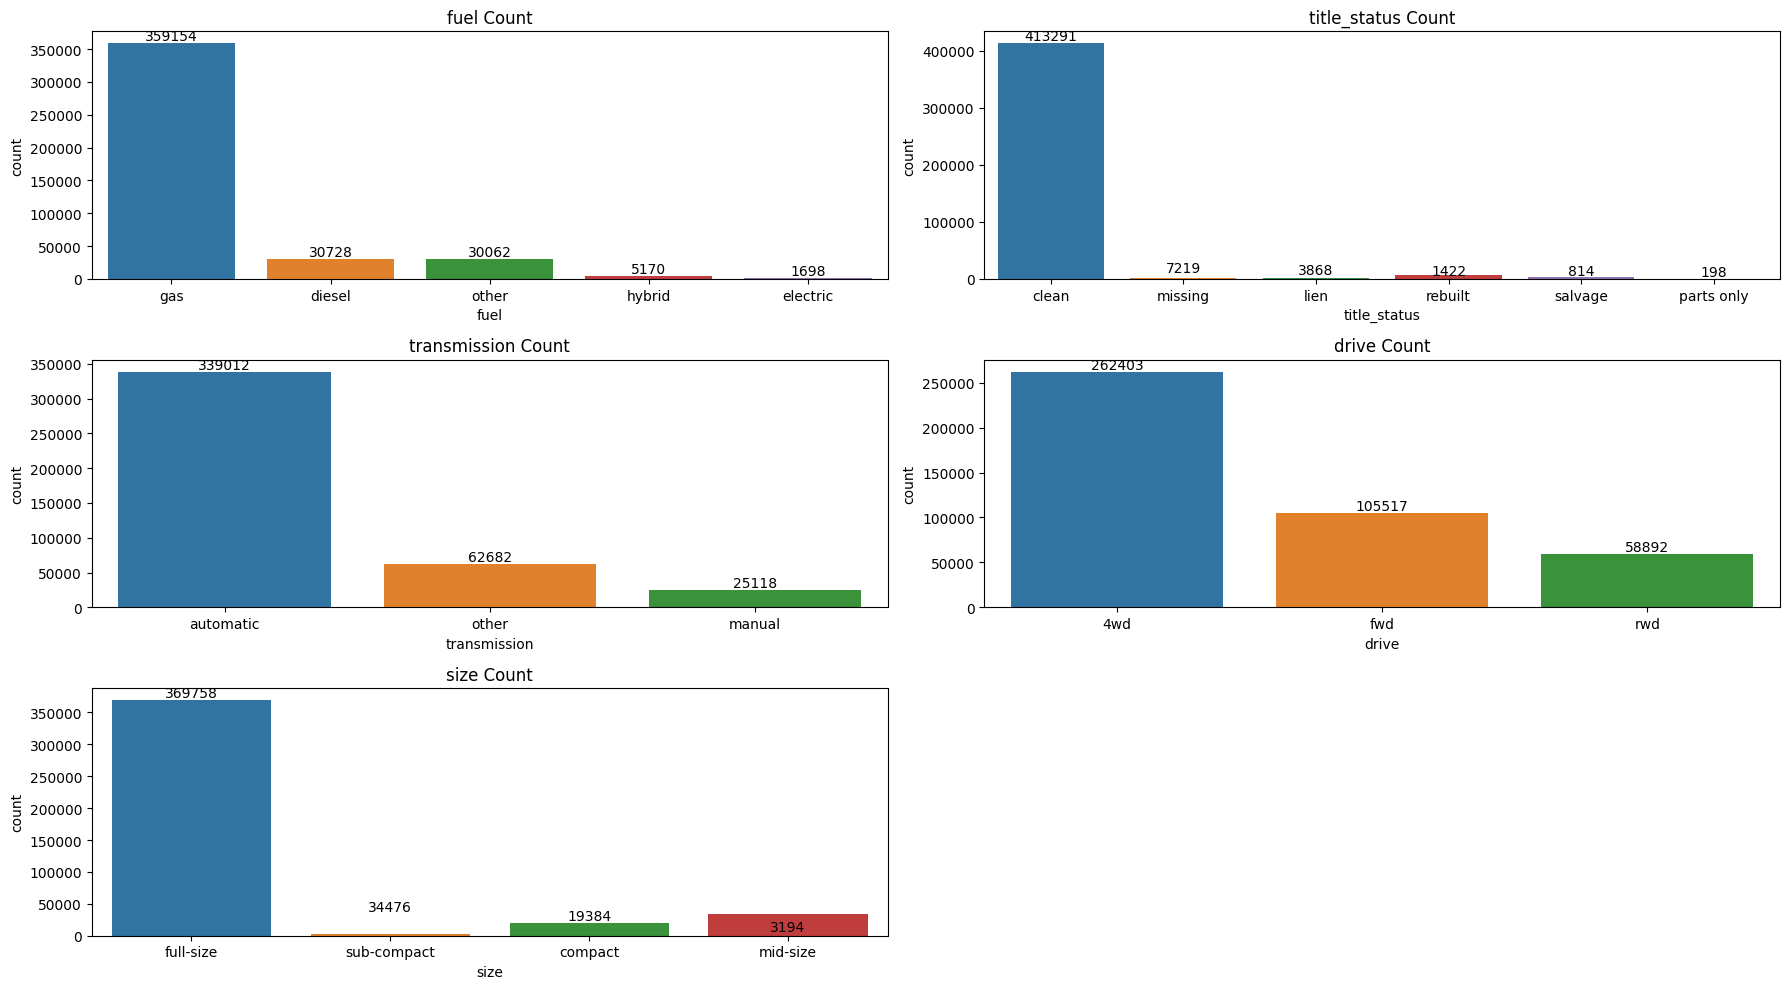

In [29]:
#visualizing the value counts for the following columns:
# cylinders, fuel, title_status, transmission, drive and size

#creating a list of the columns i want to visualize
columns = ['fuel', 'title_status', 'transmission', 'drive', 'size']

#setting up a grid for the subplots
column_number = 2
rows_number = (len(columns) + column_number - 1) // column_number

#setting the size for the entire grid
plt.figure(figsize=(18, 10))

#creating the subplots
for i, column in enumerate(columns, 1):
    plt.subplot(rows_number, column_number, i)
    sns.countplot(data=df, x=column)
    plt.title(f'{column} Count')
    plt.grid(False)
    
    #adding annotations
    value_counts = df[column].value_counts()
    for j, (value, count) in enumerate(value_counts.items(), 1):
        plt.text(j -1, count, f'{count}', ha='center', va='bottom')
        
#adjusting the layout
plt.tight_layout()


#displaying the plots
plt.show()


cylinder column has many values so i had to plot it on its own for better readability

<Axes: ylabel='cylinders'>

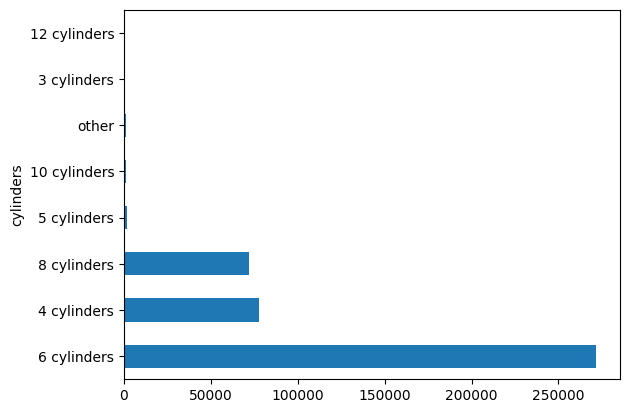

In [30]:
df['cylinders'].value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Days on Site distribution')

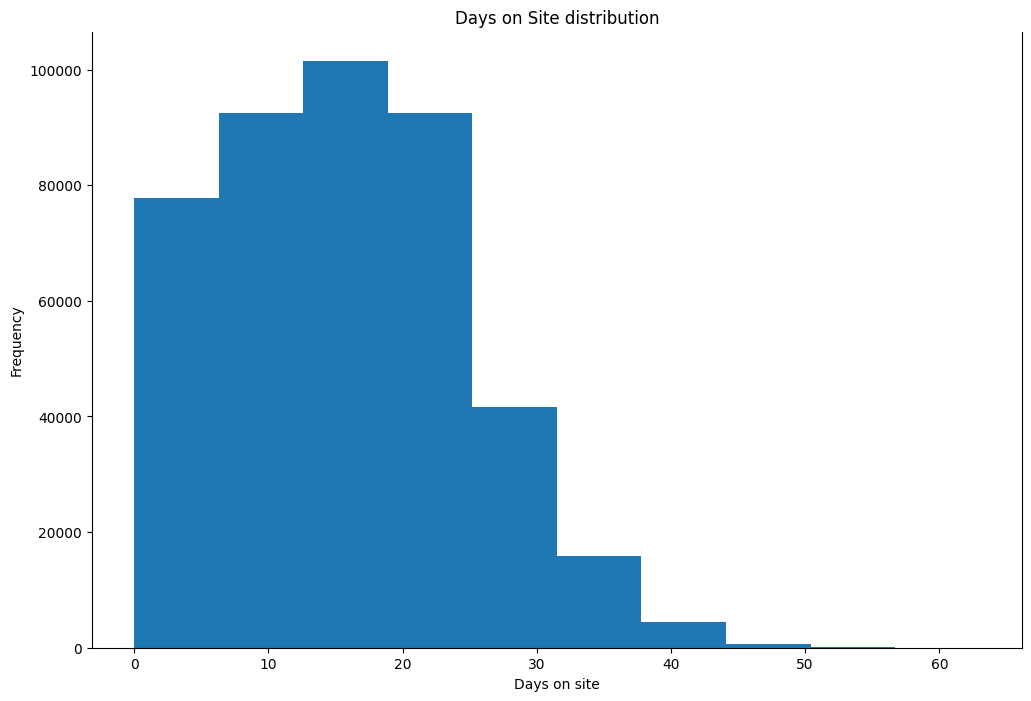

In [31]:
#visualizing the distribution of days cars spent on the site
plt.figure(figsize=(12, 8))
ax = df['days_on_site'].plot(kind='hist')
ax.spines['top'].set_visible(False)
plt.ylabel("Frequency")
plt.xlabel("Days on site")
plt.title("Days on Site distribution")

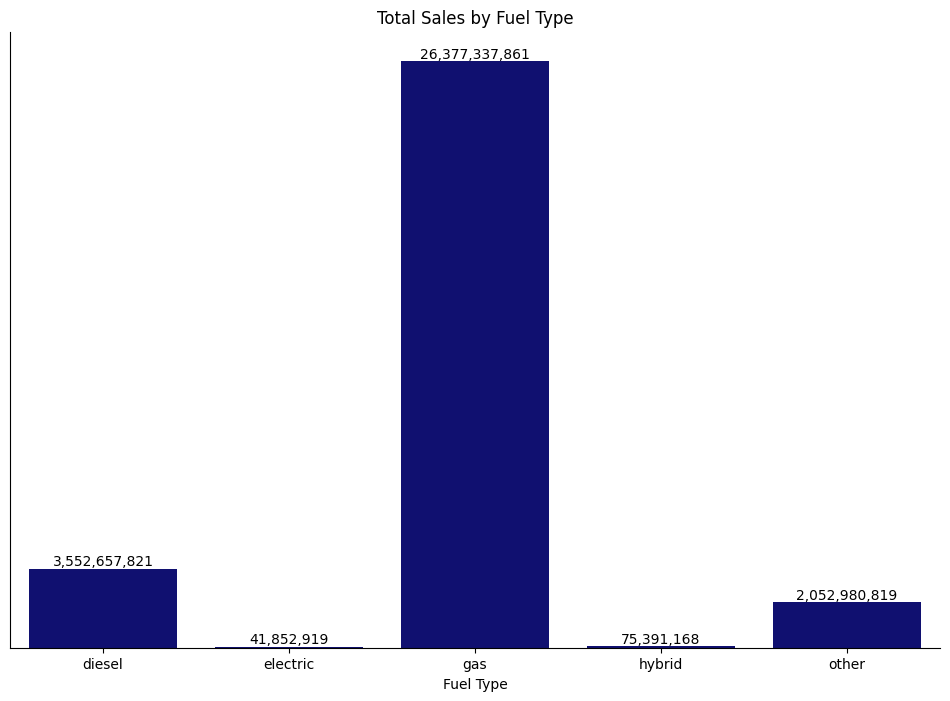

In [32]:
#showing the total amount generated by car sales for each fuel type

#grouping the data by fuel
fuel_df = df.groupby('fuel')['price'].sum().reset_index()

#plotting the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='fuel', y='price', data=fuel_df, color='navy')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
plt.xlabel('Fuel Type', rotation=0)
plt.ylabel("Total Sales")
plt.title("Total Sales by Fuel Type")
plt.grid(False)

#adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha='center', va='bottom')


#displaying the plot
plt.show()

**Cars that used gas sold more followed by diesel while electric cars generated the least sales**

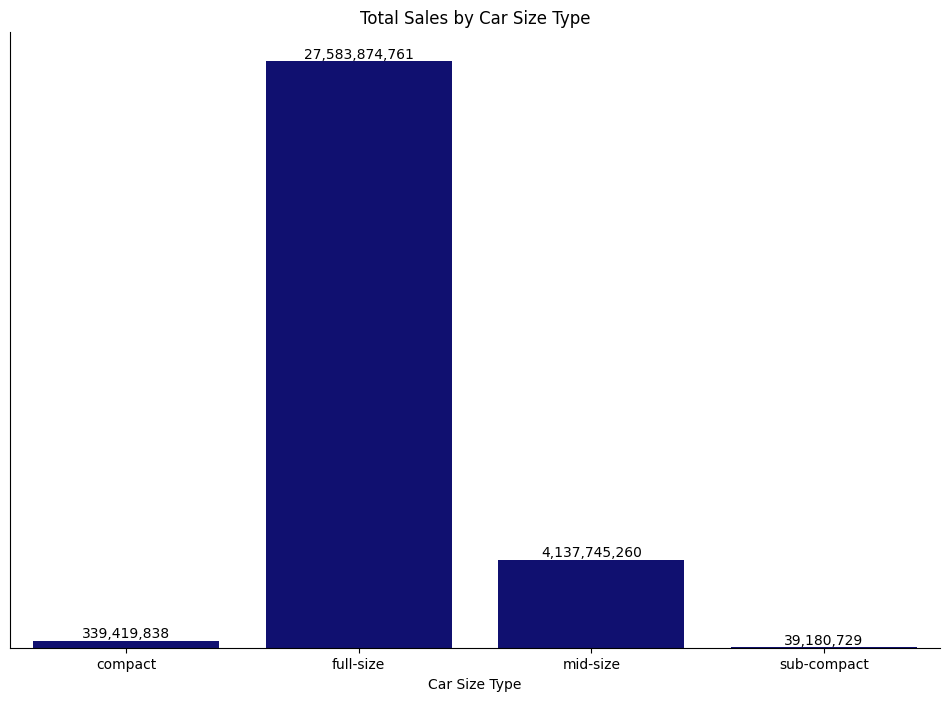

In [33]:
#visualizing the total amount generated by car sales for different sizes

#grouping the data by size
size_df = df.groupby('size')['price'].sum().reset_index()

#plotting the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='size', y='price', data=size_df, color='navy')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
plt.xlabel("Car Size Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Car Size Type")
plt.grid(False)

#adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha='center', va='bottom')
    
#displaying the plot
plt.show()

****Full size was the most sold car size while sub-compact sold less ****

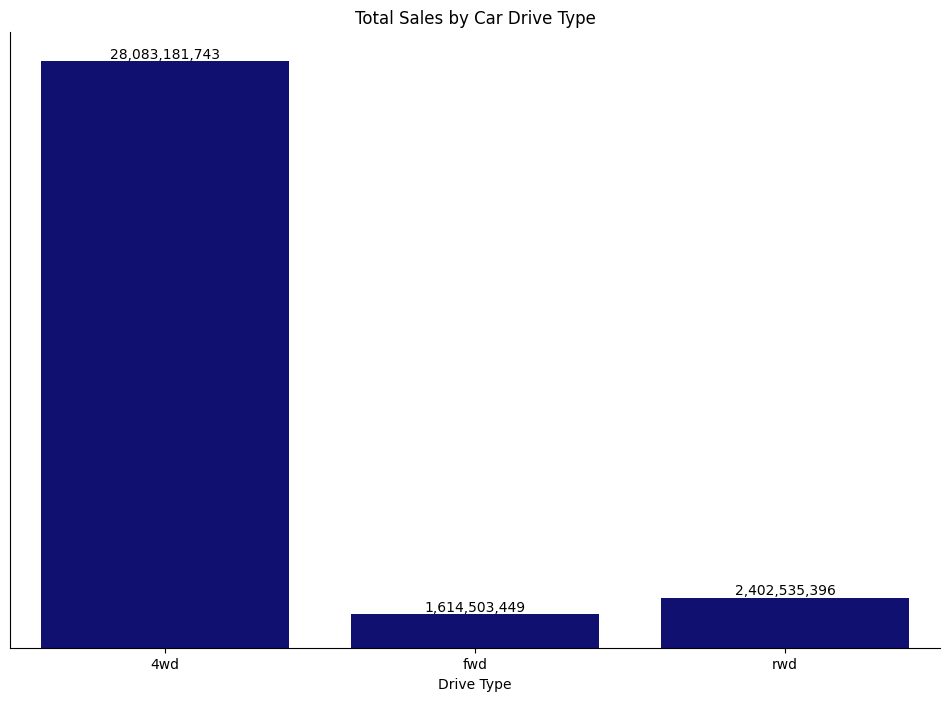

In [34]:
#visualizing the total sales generated from different drive types

#grouping the data by drive column
drive_df = df.groupby('drive')['price'].sum().reset_index()

#plotting the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='drive', y='price', data=drive_df, color='navy')

#customizing the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_visible(False)
plt.xlabel("Drive Type", rotation=0)
plt.ylabel("Total Sales")
plt.title("Total Sales by Car Drive Type")
plt.grid(False)

#annotating the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha='center', va='bottom')
    
#displaying the plot
plt.show()

**4 Wheel drive cars sold the most followed by rear wheel drive cars while front wheel drive cars generated the lowest sales**

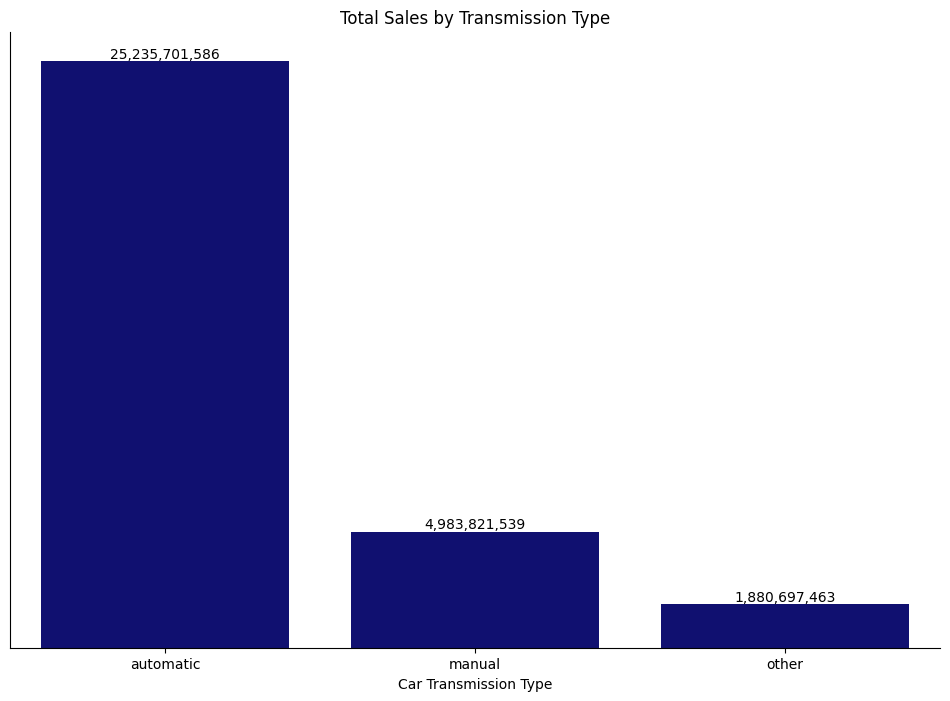

In [35]:
#visualizing the total sales for each transmission type

#grouping the data by transmission column
transmission_df = df.groupby('transmission')['price'].sum().reset_index()

#plotting the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='transmission', y='price', data=transmission_df, color='navy')

#customizing the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
plt.xlabel("Car Transmission Type")
plt.title("Total Sales by Transmission Type")
plt.grid(False)

#annotating the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.,
                p.get_height()), ha='center', va='bottom')

#displaying the plot
plt.show()

In [36]:
#setting posting_date as the index
df.set_index('posting_date', inplace=True)
df

,id,url,region,region_url,price,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,VIN,drive,size,type,paint_color,state,removal_date,days_on_site
posting_date,,,,,,,,,,,,,,,,,,,,,
2021-04-16 00:00:00+00:00,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,bmw,x5,good,6 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-05-02 00:00:00+00:00,16
2021-04-24 00:00:00+00:00,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,bmw,x5,good,6 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-04-28 00:00:00+00:00,4
2021-04-23 00:00:00+00:00,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,toyota,camry,excellent,4 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,fwd,full-size,sedan,silver,tx,2021-05-25 00:00:00+00:00,32
2021-04-16 00:00:00+00:00,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,ford,expedition,good,6 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-04-26 00:00:00+00:00,10
2021-04-24 00:00:00+00:00,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,ford,expedition,good,6 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,tx,2021-05-12 00:00:00+00:00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15 00:00:00+00:00,7307070484,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,5100,ford,saab 9-7x,fair,6 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,4wd,mid-size,SUV,grey,oh,2021-04-21 00:00:00+00:00,6
2021-04-30 00:00:00+00:00,7314635557,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,7500,ford,f-450,good,6 cylinders,gas,...,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,bus,red,oh,2021-05-15 00:00:00+00:00,15
2021-04-30 00:00:00+00:00,7314710341,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,25000,chevrolet,silverado,excellent,8 cylinders,other,...,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,truck,blue,oh,2021-05-12 00:00:00+00:00,12


In [37]:
df['day'] = df['removal_date'].dt.day_name()

In [38]:
df['month'] = df['removal_date'].dt.month_name()

## Time Series Analysis

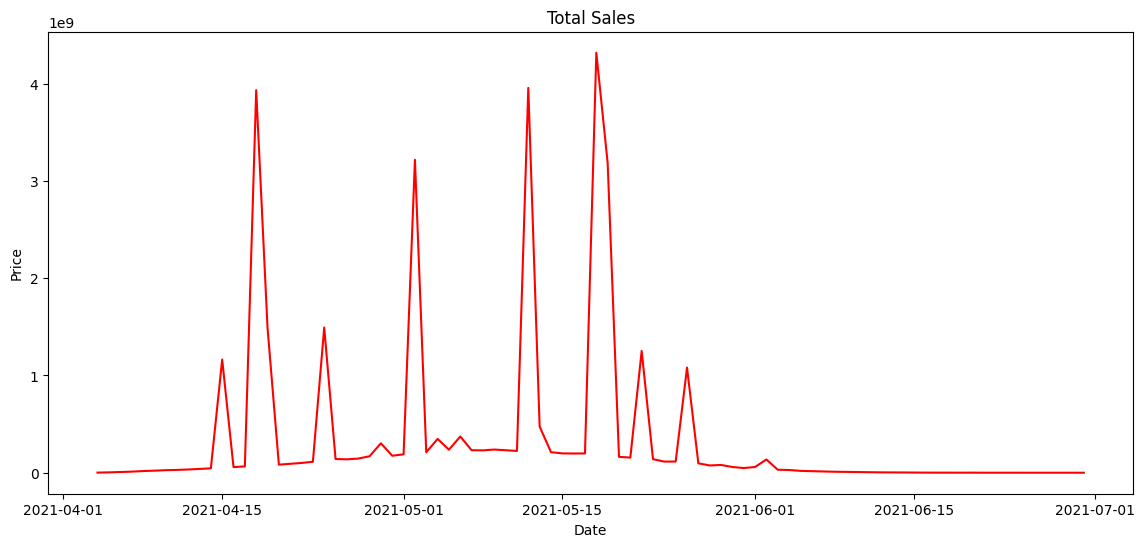

In [39]:
# visualizing the total sales by day

# aggregating the data by day and calculating the total sales per day
daily_sales = df.resample('D', on='removal_date').sum()

#plotting the data
plt.figure(figsize=(14, 6), dpi=100)
plt.plot(daily_sales.index, daily_sales['price'], color='red')
plt.gca().set(title='Total Sales', xlabel='Date', ylabel='Price')
plt.show()

In [40]:
#determining the rolling statistics
rolling_mean = daily_sales['price'].rolling(window=7).mean()
rolling_std = daily_sales['price'].rolling(window=7).std()

print(rolling_mean, rolling_std  )

removal_date
2021-04-04 00:00:00+00:00              NaN
2021-04-05 00:00:00+00:00              NaN
2021-04-06 00:00:00+00:00              NaN
2021-04-07 00:00:00+00:00              NaN
2021-04-08 00:00:00+00:00              NaN
                                 ...      
2021-06-26 00:00:00+00:00    203185.571429
2021-06-27 00:00:00+00:00    101332.714286
2021-06-28 00:00:00+00:00     73743.714286
2021-06-29 00:00:00+00:00     71008.000000
2021-06-30 00:00:00+00:00     43248.714286
Freq: D, Name: price, Length: 88, dtype: float64 removal_date
2021-04-04 00:00:00+00:00              NaN
2021-04-05 00:00:00+00:00              NaN
2021-04-06 00:00:00+00:00              NaN
2021-04-07 00:00:00+00:00              NaN
2021-04-08 00:00:00+00:00              NaN
                                 ...      
2021-06-26 00:00:00+00:00    249721.178654
2021-06-27 00:00:00+00:00     85186.123631
2021-06-28 00:00:00+00:00     80114.357787
2021-06-29 00:00:00+00:00     81352.184739
2021-06-30 00:00:00+00

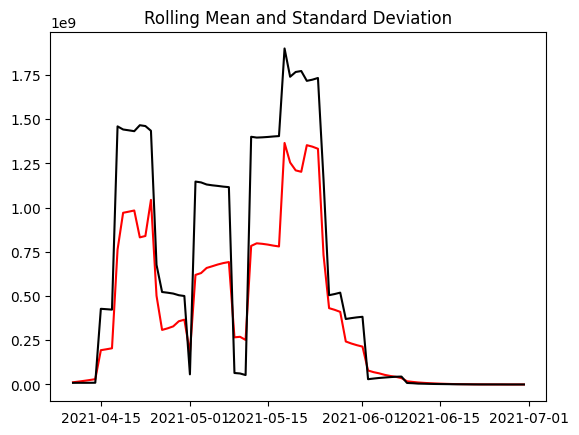

In [41]:
#plotting the rolling statistics
#original_data = plt.plot(df['price'], color='blue', label='origial')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling std')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

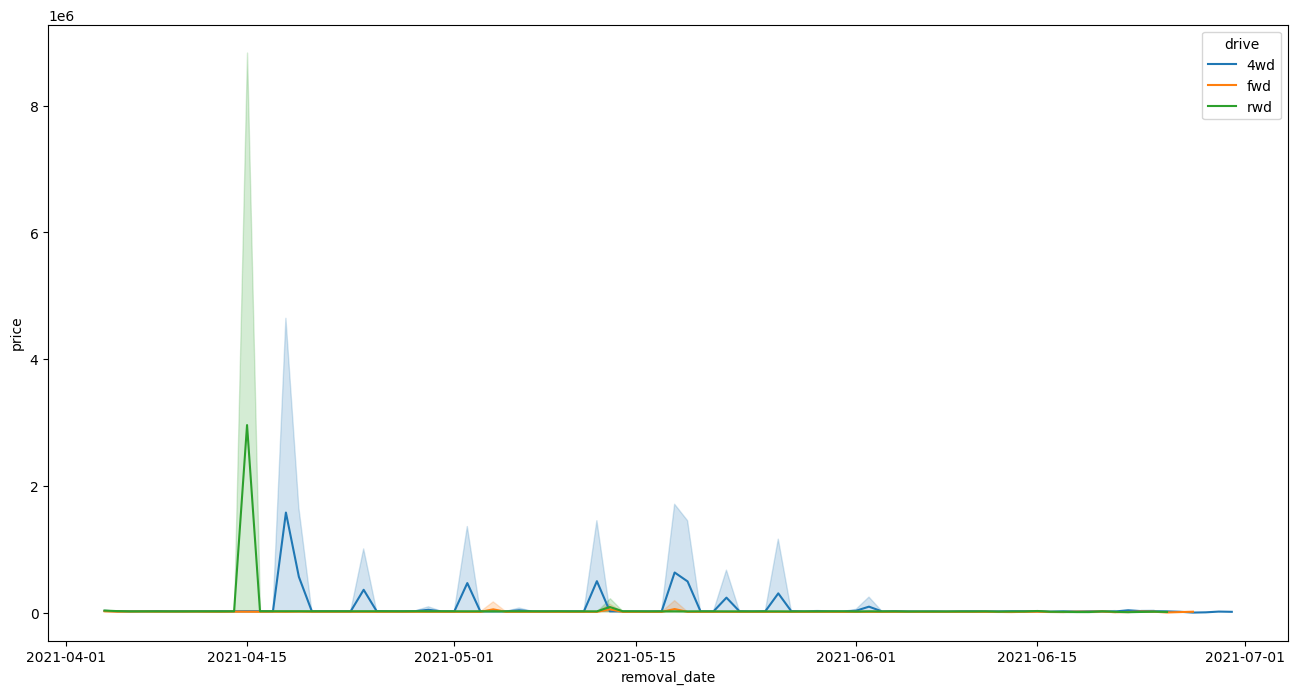

In [42]:
# visualizing the daily sales for different drive types

#creating a time series plot
plt.figure(figsize=(16, 8))
sns.lineplot(x=df['removal_date'], y=df['price'], hue=df['drive'])
plt.show()

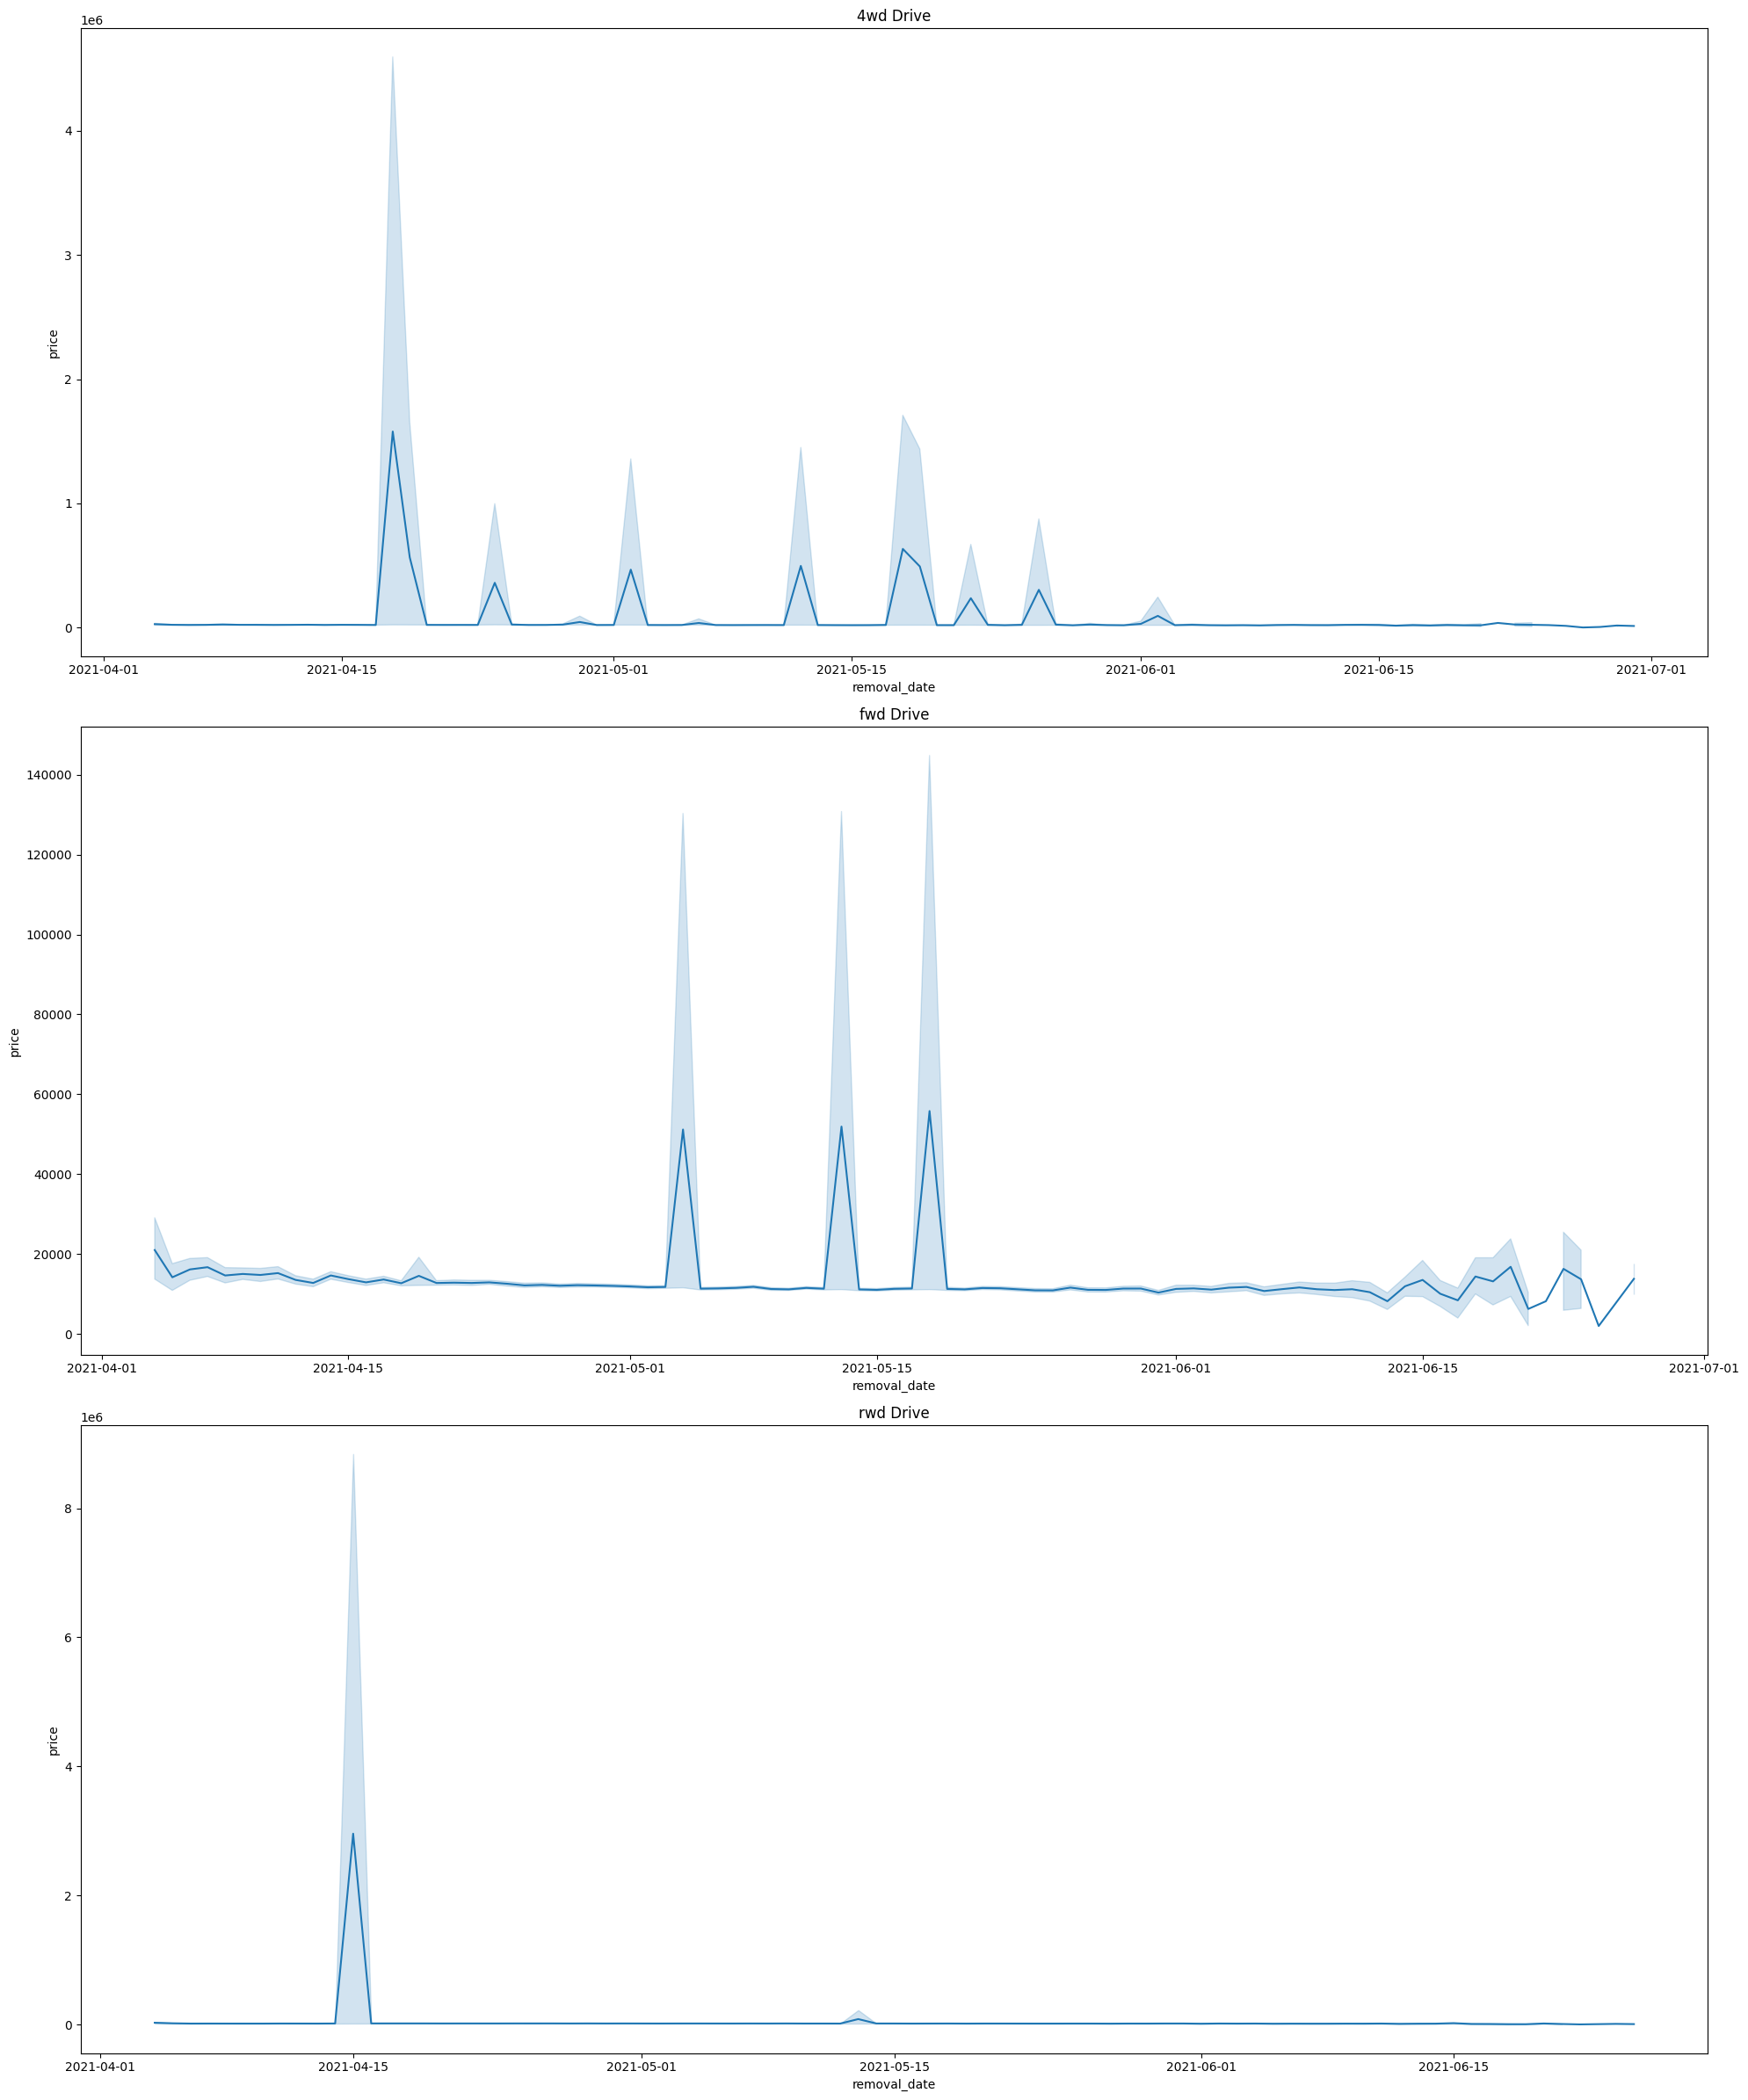

In [43]:
#visualizing the time series for the price of each drive type

#listing the driving types
drive_types = df['drive'].unique()

#creating subplots for each drive type
fig, axes = plt.subplots(len(drive_types), 1,
                        figsize=(20, 8 * len(drive_types)))

#plotting te data for eeach drive type in separate subplots
for i, drive in enumerate(drive_types):
    drive_data = df[df['drive'] == drive]
    sns.lineplot(x=drive_data['removal_date'], y=drive_data['price'], ax=axes[i])
    axes[i].set_title(f'{drive} Drive')
    
plt.tight_layout()
plt.show()

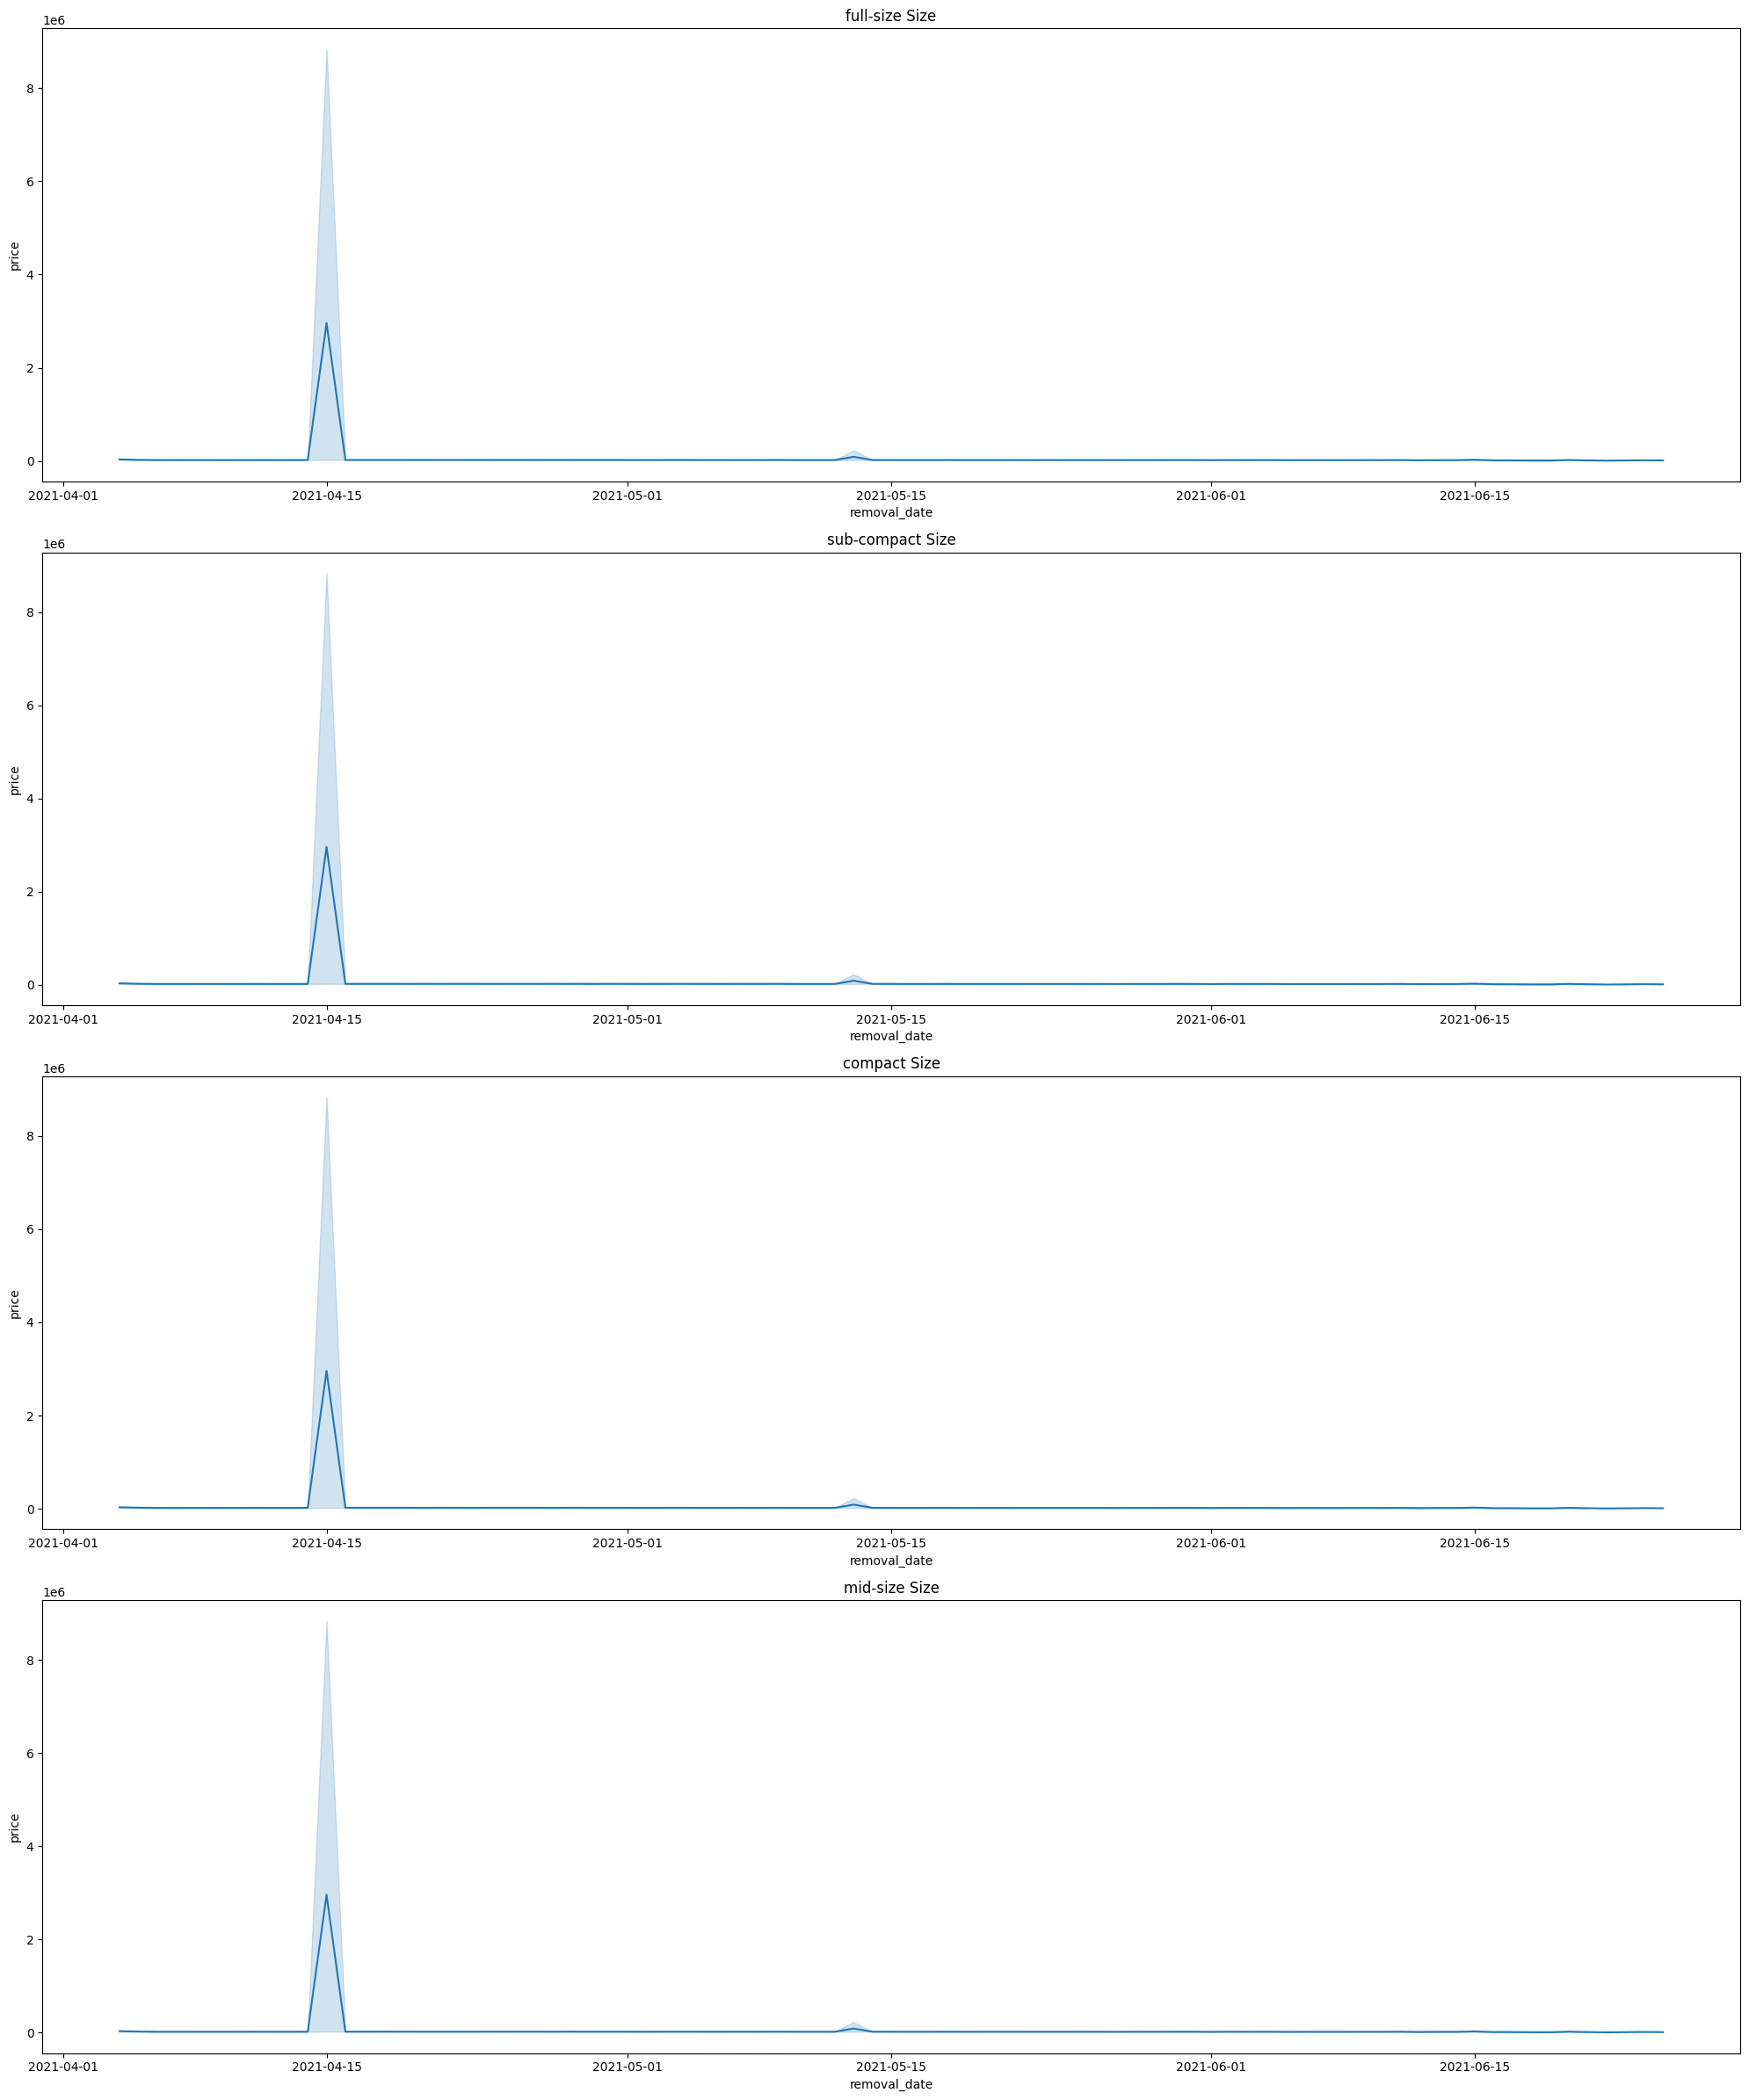

In [44]:
size_types = df['size'].unique()

#creating subplots for each drive type
fig, axes = plt.subplots(len(size_types), 1,
                        figsize=(20, 8 * len(drive_types)))

#plotting te data for eeach drive type in separate subplots
for i, size in enumerate(size_types):
    size_data = df[df['size'] == size]
    sns.lineplot(x=drive_data['removal_date'], y=drive_data['price'], ax=axes[i])
    axes[i].set_title(f'{size} Size')
    
plt.tight_layout()
plt.show()